In [1]:
import pandas as pd
from minisom import MiniSom
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataframe = pd.read_csv('../data/national_teams.csv')
dataframe.head(5)

,national_team_name,player_1_name,player_1_value,player_2_name,player_2_value,player_3_name,player_3_value,player_4_name,player_4_value,player_5_name,...,player_22_name,player_22_value,player_23_name,player_23_value,player_24_name,player_24_value,player_25_name,player_25_value,player_26_name,player_26_value
0,England - Club profile | Transfermarkt,Aaron Ramsdale,€30.00m,Jordan Pickford,€28.00m,Nick Pope,€18.00m,Ben White,€45.00m,John Stones,...,Jack Grealish,€70.00m,Raheem Sterling,€70.00m,Marcus Rashford,€55.00m,Harry Kane,€90.00m,Callum Wilson,€18.00m
1,Uruguay - Club profile | Transfermarkt,Sergio Rochet,€4.00m,Fernando Muslera,€1.70m,Sebastián Sosa,€800k,Ronald Araújo,€60.00m,José María Giménez,...,Facundo Pellistri,€3.00m,Darwin Núñez,€70.00m,Maxi Gómez,€7.50m,Edinson Cavani,€5.00m,Luis Suárez,€4.00m
2,Belgium - Club profile | Transfermarkt,Thibaut Courtois,€60.00m,Koen Casteels,€8.00m,Simon Mignolet,€5.00m,Arthur Theate,€20.00m,Wout Faes,...,Jérémy Doku,€18.00m,Romelu Lukaku,€55.00m,Loïs Openda,€12.00m,Michy Batshuayi,€10.00m,Dries Mertens,€3.40m
3,Poland - Club profile | Transfermarkt,Wojciech Szczesny,€13.00m,Kamil Grabara,€5.00m,Lukasz Skorupski,€3.00m,Jan Bednarek,€18.00m,Jakub Kiwior,...,Michal Skoras,€3.50m,Robert Lewandowski,€45.00m,Krzysztof Piatek,€11.00m,Arkadiusz Milik,€10.00m,Karol Swiderski,€5.00m
4,Morocco - Club profile | Transfermarkt,Bono,€15.00m,Ahmed Reda Tagnaouti,€1.80m,Munir,€1.20m,Nayef Aguerd,€25.00m,Romain Saïss,...,Anass Zaroury,€4.00m,Zakaria Aboukhlal,€3.50m,Youssef En-Nesyri,€12.00m,Abderrazak Hamdallah,€3.00m,Walid Cheddira,€2.50m


In [3]:
for i in range(26):
    value_column = 'player_' + str(i+1) + '_value'
    dataframe[value_column] = dataframe[value_column].map(lambda x: float(x[1:-1]))

In [4]:
new_df = copy.copy(dataframe)
new_df.drop('national_team_name', axis=1, inplace=True)
for i in range(26):
    name_column = 'player_' + str(i+1) + '_name'
    new_df.drop(name_column, axis=1, inplace=True)
    
new_df.head(5)

,player_1_value,player_2_value,player_3_value,player_4_value,player_5_value,player_6_value,player_7_value,player_8_value,player_9_value,player_10_value,...,player_17_value,player_18_value,player_19_value,player_20_value,player_21_value,player_22_value,player_23_value,player_24_value,player_25_value,player_26_value
0,30.0,28.0,18.0,45.0,30.0,30.0,30.0,18.0,28.0,70.0,...,32.0,15.0,90.0,75.0,55.0,70.0,70.0,55.0,90.0,18.0
1,4.0,1.7,800.0,60.0,40.0,6.0,700.0,500.0,15.0,6.0,...,13.0,4.5,19.0,8.0,4.0,3.0,70.0,7.5,5.0,4.0
2,60.0,8.0,5.0,20.0,20.0,8.0,4.0,1.8,28.0,6.5,...,15.0,30.0,30.0,9.0,7.5,18.0,55.0,12.0,10.0,3.4
3,13.0,5.0,3.0,18.0,6.0,3.0,800.0,300.0,22.0,3.5,...,15.0,40.0,14.0,10.0,700.0,3.5,45.0,11.0,10.0,5.0
4,15.0,1.8,1.2,25.0,6.5,2.5,1.2,1.0,1.5,65.0,...,4.5,4.5,3.0,8.0,8.0,4.0,3.5,12.0,3.0,2.5


In [5]:
new_df = (new_df - np.mean(new_df, axis=0)) / np.std(new_df, axis=0)


In [6]:
new_df

,player_1_value,player_2_value,player_3_value,player_4_value,player_5_value,player_6_value,player_7_value,player_8_value,player_9_value,player_10_value,...,player_17_value,player_18_value,player_19_value,player_20_value,player_21_value,player_22_value,player_23_value,player_24_value,player_25_value,player_26_value
0,-0.243384,-0.549714,-0.684751,-0.007269,-0.178092,-0.411582,-0.438132,-0.496424,-0.362802,-0.058746,...,-0.221890,-0.322020,0.246457,0.135228,-0.343322,-0.075834,-0.008046,0.001144,-0.094167,-0.440401
1,-0.365684,-0.650452,2.238303,0.166972,-0.112430,-0.499170,2.436883,1.901135,-0.420822,-0.377629,...,-0.338508,-0.421106,-0.320901,-0.561200,-0.516582,-0.379786,-0.008046,-0.294395,-0.477971,-0.510301
2,-0.102270,-0.626321,-0.733344,-0.297672,-0.243754,-0.491871,-0.549700,-0.577006,-0.362802,-0.375138,...,-0.326232,-0.180470,-0.233001,-0.550805,-0.504692,-0.311737,-0.092507,-0.266396,-0.455394,-0.513296
3,-0.323349,-0.637812,-0.740820,-0.320904,-0.335681,-0.510119,2.865990,0.906297,-0.389581,-0.390086,...,-0.326232,-0.086102,-0.360856,-0.540411,1.847918,-0.377518,-0.148814,-0.272618,-0.455394,-0.505308
4,-0.313942,-0.650069,-0.747548,-0.239592,-0.332397,-0.511944,-0.561714,-0.580985,-0.481073,-0.083659,...,-0.390679,-0.421106,-0.448757,-0.561200,-0.502993,-0.375250,-0.382489,-0.266396,-0.487002,-0.517790
5,-0.378384,-0.652750,2.612095,-0.123431,4.877874,2.033589,2.007776,2.274200,1.743754,4.325899,...,-0.344646,-0.435261,0.086637,-0.631882,2.527372,3.689539,-0.371228,-0.266396,-0.477971,-0.523282
6,-0.266903,-0.630151,-0.733344,-0.483530,-0.178092,-0.448077,-0.523953,-0.566063,-0.472147,-0.382612,...,-0.396817,-0.435261,-0.392820,-0.581989,-0.516582,-0.379786,-0.396566,-0.185512,-0.410241,-0.500315
7,-0.344516,-0.637812,-0.738951,0.166972,-0.256886,-0.500995,-0.551845,-0.576011,-0.398507,-0.375138,...,-0.356921,-0.227653,-0.296929,-0.436466,-0.462226,-0.348030,-0.351520,-0.291284,-0.473456,-0.500315
8,-0.266903,-0.618660,-0.740072,0.108892,-0.046768,-0.502820,-0.553991,-0.516321,-0.447600,-0.282961,...,-0.221890,-0.322020,-0.352865,-0.602778,-0.360308,-0.211932,-0.345890,-0.154403,-0.161897,-0.370501
9,1.732217,0.109103,-0.191345,5.278060,2.251398,0.938736,0.827733,0.284524,2.859515,2.083751,...,0.502366,1.423772,-0.440766,1.954257,2.527372,0.854168,0.864715,-0.328615,2.208658,0.967581


In [44]:
data = new_df.values
n_neurons = 4
m_neurons = 4
som = MiniSom(n_neurons, m_neurons, 26, sigma=0.5, learning_rate=0.8)
som.pca_weights_init(data)
som.train(data, 1000, verbose=True)
print('topographical error:' + str(som.topographic_error(data)))


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5382661991696719
topographical error:0.1935483870967742


In [45]:
len(som.get_weights())


4

In [46]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
winner_coordinates

array([[0, 0, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 3, 1, 1, 0,
        0, 0, 0, 0, 3, 0, 3, 0, 2],
       [1, 3, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 3, 1, 0, 2, 1, 2,
        1, 1, 1, 1, 3, 2, 2, 2, 3]])

In [47]:
cluster_index = np.ravel_multi_index(winner_coordinates, (4,4))
cluster_index

array([ 1,  3,  1,  7,  2, 13,  2,  1,  1,  9,  1,  2, 10,  8,  4,  0, 11,
        1, 12,  6,  5,  2,  1,  1,  1,  1, 15,  2, 14,  2, 11])

KeyError: 0

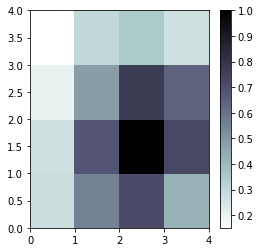

In [51]:
plt.figure(figsize=(4, 4))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[new_df[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[new_df[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()
